# Importing Data

In [36]:
#Download & Fetch the data
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-m12/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [37]:
fetch_housing_data

<function __main__.fetch_housing_data(housing_url='https://raw.githubusercontent.com/ageron/handson-m12/master/datasets/housing/housing.tgz', housing_path='datasets/housing')>

In [38]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [39]:
load_housing_data

<function __main__.load_housing_data(housing_path='datasets/housing')>

In [40]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [41]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [42]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [43]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


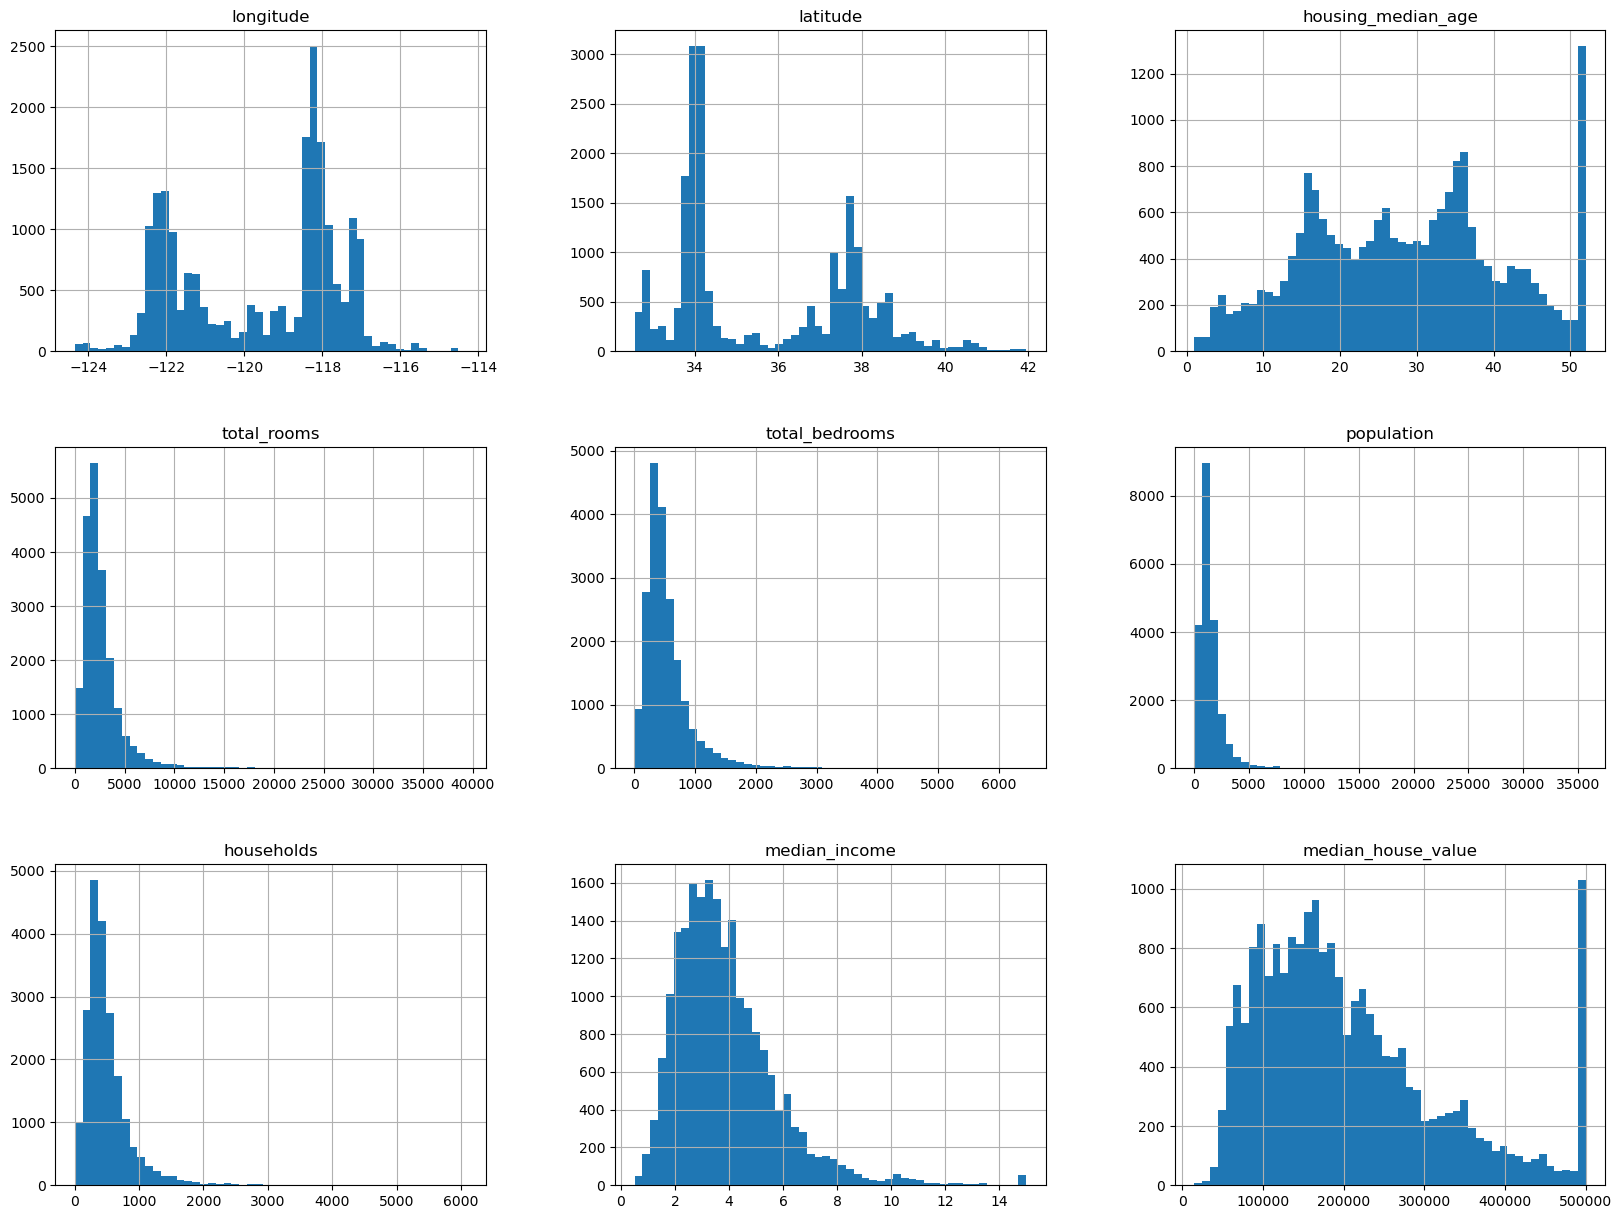

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

# Train/Test Sets

In [45]:
#Train/Test Set Split
#Algorithm: Take 20% of the data and use that as the test set. Remaining 80% is the train set - Can use the literal dataset indices, but shuffle before (permutation)
import numpy as np

def split_train_test(data, test_ratio):
    np.random.seed(42) #42!
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [46]:
#Train/Test split: accounting for risk of mixing sets over time
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [47]:
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")
print("train set:", len(train_set))
print("test set:", len(test_set))

train set: 16512
test set: 4128


<AxesSubplot:>

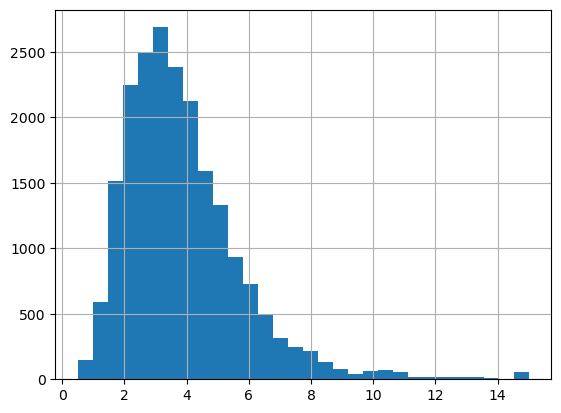

In [50]:
#Median district income is an important feature
housing["median_income"].hist(bins=30)
#tens of thousands of $USD

In [51]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1,2, 3, 4, 5])

<AxesSubplot:>

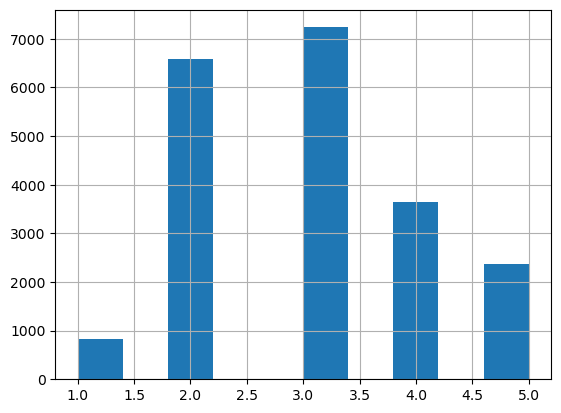

In [52]:
housing["income_cat"].hist()

In [54]:
#Stratified sampling: income category
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [55]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [56]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [58]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Exploratory Data Analysis

In [59]:
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

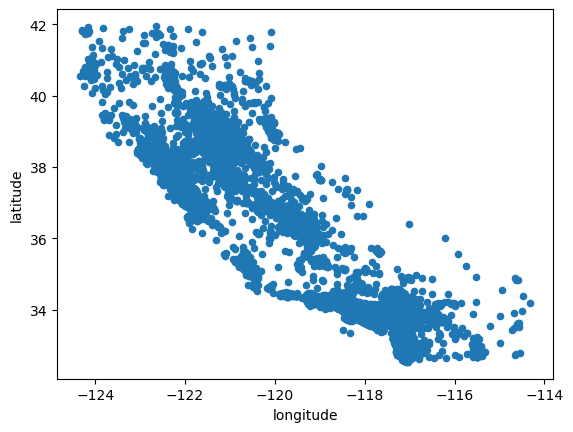

In [63]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

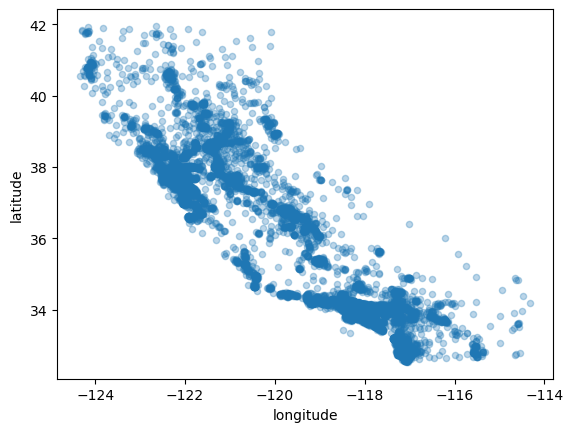

In [66]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.3)

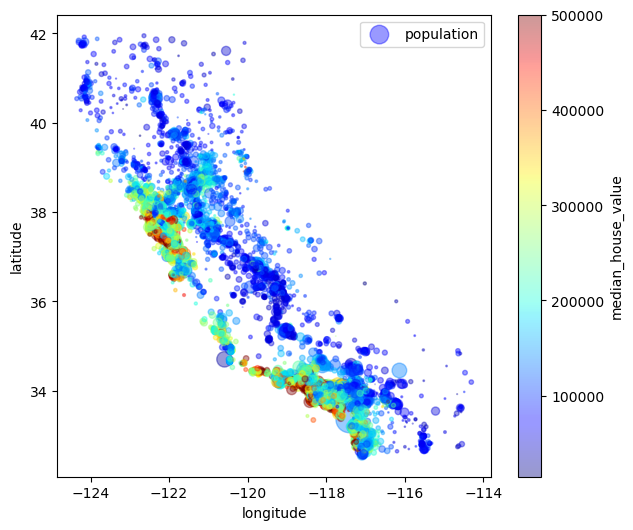

In [77]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population", figsize=(7,6), #s: size
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True) #c: color
plt.legend()

In [79]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


<AxesSubplot:>

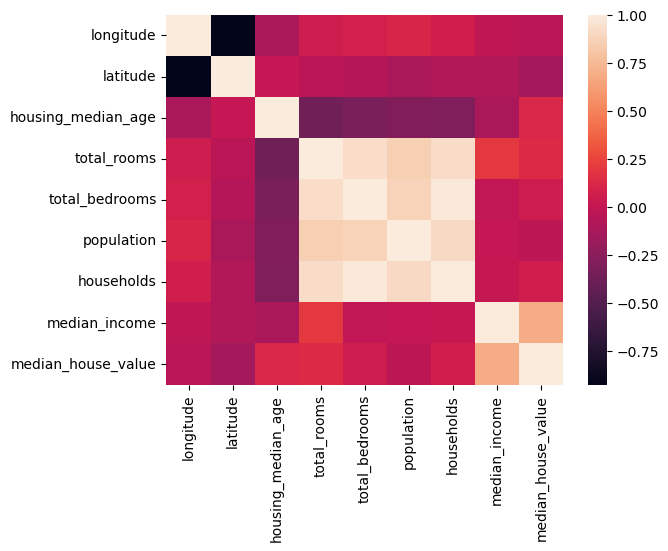

In [98]:
import seaborn as sns
sns.heatmap(corr_matrix)

In [100]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

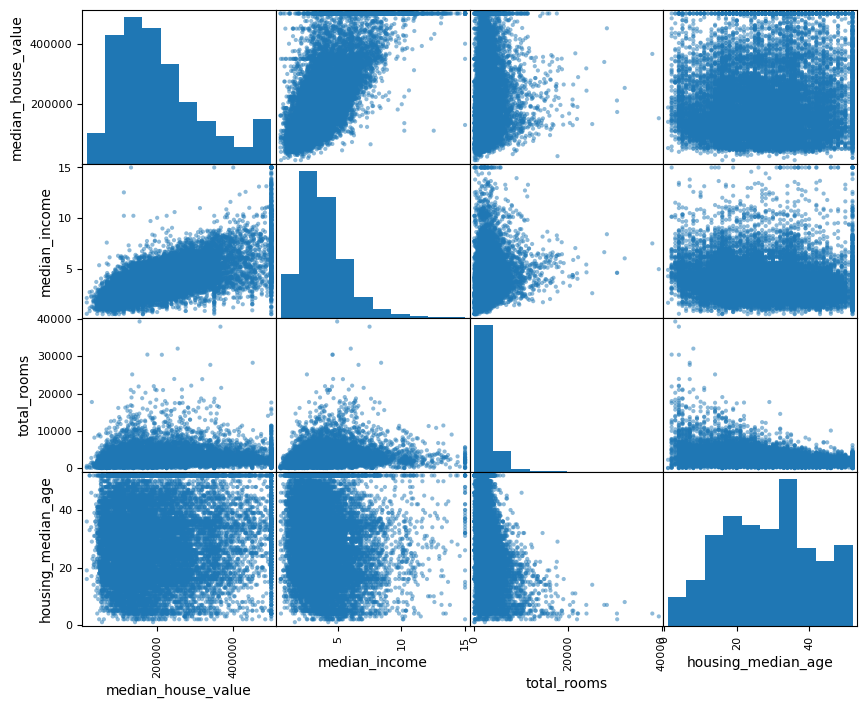

In [102]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(10,8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

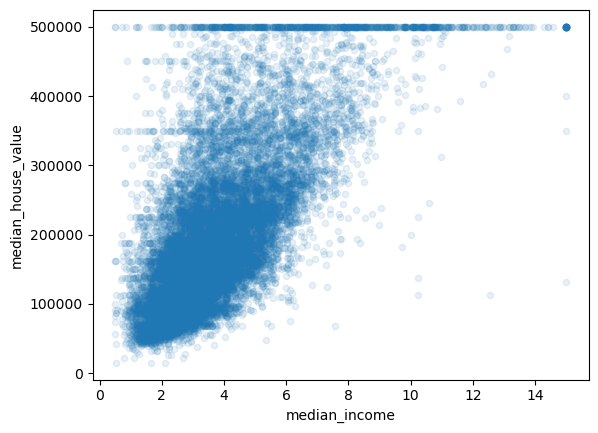

In [104]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1)

In [105]:
#Horizontal lines at $500,000 (capped house value), ~$450,000, $350,000, etc.

# Attribute Combinations

In [107]:
housing["rooms_per_housefold"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [108]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_housefold         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

# Data Preparation

In [110]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [111]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [112]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [113]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [114]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [116]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [117]:
X = imputer.transform(housing_num)

In [118]:
#making it a pandas dataframe
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

# Categorical/Text Variables

In [119]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head()

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


In [121]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

In [123]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:15]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [4.]])

In [124]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [126]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [127]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [128]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# Transformations

In [134]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

# Feature Scaling

In [136]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [139]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

In [143]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

# Choosing a Model

# Linear Regression

In [144]:
#Linear Regression

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [146]:
#Random sampling testing
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [148]:
from sklearn.metrics import mean_squared_error
housing_predictions_lin_reg = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions_lin_reg)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

In [149]:
#lin_reg: underfitting the data

# Decision Tree

In [150]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [151]:
housing_predictions_dec_tree = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions_dec_tree)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [152]:
#Decision Tree: Overfitting the data

# Cross-Validation

In [165]:
from sklearn.model_selection import cross_val_score
tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

In [166]:
def display_scores(scores):
    print("Scores:", scores)
    print("\t")
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [167]:
display_scores(tree_rmse_scores)

Scores: [72304.53043865 71410.4030887  69102.03370957 71864.55334377
 69518.69914539 78090.26095735 71022.82507286 73124.64260305
 67919.52499649 70742.52765528]
	
Mean: 71510.00010110906
Standard deviation: 2648.683747609088


In [169]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
	
Mean: 69104.07998247063
Standard deviation: 2880.3282098180634


# Random Forrest

In [170]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [173]:
housing_predictions_rand_forest = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions_rand_forest)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18759.52920579177

In [175]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51216.03278173 49221.88437203 46967.20657515 51853.97166963
 47113.14201314 51795.53854601 52849.22587766 49528.23311517
 47966.17841057 54071.36140179]
	
Mean: 50258.27747628749
Standard deviation: 2338.0151355878556


# Support Vector Regressor (kernel=linear)

In [176]:
from sklearn.svm import SVR

svm = SVR()
svm.fit(housing_prepared, housing_labels)

SVR()

In [180]:
housing_predictions_svm = svm.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions_svm)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

118578.69234925653

In [181]:
svm_scores = cross_val_score(svm, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
svm_rmse_scores = np.sqrt(- svm_scores)
display_scores(svm_rmse_scores)

Scores: [116729.13778306 120113.99351281 113925.04340616 120399.11878641
 114687.49942071 122785.64737282 119853.79338279 118280.31108193
 120230.82615529 118840.1885232 ]
	
Mean: 118584.55594251942
Standard deviation: 2609.6120823493407


# Support Vector Regressor (kernel=poly)

In [199]:
from sklearn.svm import SVR

svm_poly = SVR(kernel='poly')
svm_poly.fit(housing_prepared, housing_labels)

SVR(kernel='poly')

In [200]:
housing_predictions_svm_poly = svm_poly.predict(housing_prepared)
svm_poly_mse = mean_squared_error(housing_labels, housing_predictions_svm_poly)
svm_poly_rmse = np.sqrt(svm_poly_mse)
svm_poly_rmse

118429.61476365758

In [202]:
svm_poly_scores = cross_val_score(svm_poly, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
svm_poly_rmse_scores = np.sqrt(- svm_poly_scores)
display_scores(svm_poly_rmse_scores)

Scores: [116631.48683272 120067.0396272  114120.75279813 120336.06224697
 116047.67419748 122684.28511773 119759.16841172 118396.96066063
 120119.99447634 118794.5082534 ]
	
Mean: 118695.79326223345
Standard deviation: 2365.204398385141


# Linear Support Vector Regression

In [186]:
from sklearn.svm import LinearSVR

lin_svm = LinearSVR()
lin_svm.fit(housing_prepared, housing_labels)

LinearSVR()

In [187]:
housing_predictions_lin_svm = lin_svm.predict(housing_prepared)
lin_svm_mse = mean_squared_error(housing_labels, housing_predictions_lin_svm)
lin_svm_rmse = np.sqrt(lin_svm_mse)
lin_svm_rmse

218350.0174075901

In [188]:
lin_svm_scores = cross_val_score(lin_svm, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_svm_rmse_scores = np.sqrt(- lin_svm_scores)
display_scores(lin_svm_rmse_scores)

Scores: [217175.72549406 224521.9620495  212148.72370351 222495.87239957
 214562.88463364 225734.96542686 222340.54471311 220301.24481705
 222668.84534859 219784.30785366]
	
Mean: 220173.50764395582
Standard deviation: 4137.459912804905


# MLP Regressor (neural network)

In [190]:
from sklearn.neural_network import MLPRegressor

mlp_reg = MLPRegressor()
mlp_reg.fit(housing_prepared, housing_labels)

/Users/michaeldavid/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [192]:
housing_predictions_mlp_reg = mlp_reg.predict(housing_prepared)
mlp_reg_mse = mean_squared_error(housing_labels, housing_predictions_mlp_reg)
mlp_reg_rmse = np.sqrt(mlp_reg_mse)
mlp_reg_rmse

158313.80580621492

In [193]:
mlp_reg_scores = cross_val_score(mlp_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
mlp_reg_rmse_scores = np.sqrt(- mlp_reg_scores)
display_scores(mlp_reg_rmse_scores)

/Users/michaeldavid/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldavid/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldavid/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaeldavid/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.wa

Scores: [172272.14752002 174974.61212201 170096.03546854 172896.37895547
 164891.81384931 178204.00701997 175664.77676714 173300.15266243
 170637.73036628 171914.3627388 ]
	
Mean: 172485.20174699632
Standard deviation: 3420.4804021609752


/Users/michaeldavid/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Fine Tuning

In [215]:
#Fine tuning the random forest^
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [100, 200, 300], 'max_features':[4, 6, 8, 10]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [4, 6, 8, 10],
                          'n_estimators': [100, 200, 300]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [216]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 200}

In [217]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=200)

In [218]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49691.41532554484 {'max_features': 4, 'n_estimators': 100}
49436.037377749046 {'max_features': 4, 'n_estimators': 200}
49301.116302734576 {'max_features': 4, 'n_estimators': 300}
49183.60446366061 {'max_features': 6, 'n_estimators': 100}
49076.81004701432 {'max_features': 6, 'n_estimators': 200}
49083.72035570126 {'max_features': 6, 'n_estimators': 300}
49366.29626206881 {'max_features': 8, 'n_estimators': 100}
49320.07702331147 {'max_features': 8, 'n_estimators': 200}
49229.18897732067 {'max_features': 8, 'n_estimators': 300}
49629.715494839205 {'max_features': 10, 'n_estimators': 100}
49384.00365731788 {'max_features': 10, 'n_estimators': 200}
49310.519367024266 {'max_features': 10, 'n_estimators': 300}
62100.04985144234 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54333.86349540608 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60031.000340137645 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52405.384314783696 {'bootstrap': False, 'max_feature

In [221]:
#RandomSearchCV of hyperparameters
from sklearn.model_selection import RandomizedSearchCV

#forest_reg = RandomForestRegressor()

param_distributions = {
    'n_estimators': np.arange(50, 300, 50),          # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],        # Number of features to consider at every split
    'max_depth': [None, 10, 20, 30, 40, 50],         # Maximum number of levels in the tree
    'min_samples_split': np.arange(2, 11),           # Minimum number of samples required to split a node
    'min_samples_leaf': np.arange(1, 11),            # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]                       # Whether bootstrap samples are used when building trees
}

random_grid_search = RandomizedSearchCV(forest_reg, param_distributions, cv=5,scoring='neg_mean_squared_error', return_train_score=True)

random_grid_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250])},
                   return_train_score=True, scoring='neg_mean_squared_error')

In [222]:
random_grid_search.best_params_

{'n_estimators': 250,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 20,
 'bootstrap': False}

In [223]:
rcvres = random_grid_search.cv_results_
for mean_score, params in zip(rcvres["mean_test_score"], rcvres["params"]):
    print(np.sqrt(-mean_score), params)

50132.92351732941 {'n_estimators': 50, 'min_samples_split': 8, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False}
50081.65317400262 {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_depth': 50, 'bootstrap': False}
48638.29934261479 {'n_estimators': 150, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
52099.777639438034 {'n_estimators': 50, 'min_samples_split': 9, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}
49347.81058733236 {'n_estimators': 50, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 50, 'bootstrap': False}
49371.54083186165 {'n_estimators': 150, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 50, 'bootstrap': False}
48652.258199691074 {'n_estimators': 250, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', '

In [224]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.54999307e-02, 6.93513222e-02, 4.13753091e-02, 1.77179745e-02,
       1.66730450e-02, 1.73427122e-02, 1.59442117e-02, 3.35131915e-01,
       5.76568306e-02, 1.08482814e-01, 7.11273474e-02, 1.07132373e-02,
       1.54818603e-01, 1.10692767e-04, 3.20843073e-03, 4.84562307e-03])

In [227]:
extra_attributes = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attributes = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attributes + cat_one_hot_attributes
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3351319152343639, 'median_income'),
 (0.15481860300001254, 'INLAND'),
 (0.10848281438121302, 'pop_per_hhold'),
 (0.07549993067803078, 'longitude'),
 (0.07112734736845573, 'bedrooms_per_room'),
 (0.0693513222264096, 'latitude'),
 (0.05765683056891125, 'rooms_per_hhold'),
 (0.041375309128679566, 'housing_median_age'),
 (0.017717974535044288, 'total_rooms'),
 (0.01734271224327961, 'population'),
 (0.016673045017340835, 'total_bedrooms'),
 (0.01594421171662569, 'households'),
 (0.010713237334356931, '<1H OCEAN'),
 (0.004845623065769605, 'NEAR OCEAN'),
 (0.003208430734876013, 'NEAR BAY'),
 (0.000110692766630561, 'ISLAND')]

In [231]:
final_model = random_grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

46479.0472670803